In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import nltk
from nltk.tokenize import sent_tokenize
import textstat


In [58]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\wojom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Datasets Mappings (model -> file)


In [59]:
DATASET = '../CL4R1T4S'
DATASET_CLEANED = '../CL4R1T4S-no-code'



PROMPTS = {
    "../CL4R1T4S": {
        "ANTHROPIC": {
            "Claude Sonnet 4": [
                "/ANTHROPIC/Claude_4.txt"
            ],
            "Claude Sonnet 3.5": [
                "/ANTHROPIC/Claude_Sonnet_3.5.md"
            ],
            "Claude Sonnet 3.7": [
                "/ANTHROPIC/Claude_Sonnet_3.7_New.txt"
            ],
            "Claude Sonnet 4.5": [
                "/ANTHROPIC/Claude_Sonnet-4.5_Sep-29-2025.txt"
            ],
            "Claude Opus 4.1": [
                "/ANTHROPIC/Claude-4.1.txt"
            ],
            "Claude Opus 4.5": [
                "/ANTHROPIC/Claude-4.5-Opus.txt"
            ]
        },
        "GOOGLE": {
            "Gemini Diffusion": [
                "/GOOGLE/Gemini_Diffusion.md"
            ],
            "Gemini 2.5 Pro": [
                "/GOOGLE/Gemini-2.5-Pro-04-18-2025.md"
            ]
        },
        "XAI": {
            "Grok 4": [
                "/XAI/Grok4-July-10-2025.md"
            ],
            "Grok 4.1": [
                "/XAI/GROK-4.1_Nov-17-2025.txt"
            ],
            "Grok 3": [
                "/XAI/Grok3_updated_07-08-2025.md"
            ]
        },
        "OPENAI": {
            "Atlas": [
                "/OPENAI/Atlas_10-21-25.txt"
            ],
            "ChatGPT 4.1": [
                "/OPENAI/ChatGPT_4.1_05-15-2025.txt"
            ],
            "ChatGPT 4o": [
                "/OPENAI/ChatGPT_4o_04-25-2025.txt"
            ],
            "ChatGPT o4 mini": [
                "/OPENAI/ChatGPT_o3_o4-mini_04-16-2025"
            ],
            "ChatGPT 5": [
                "/OPENAI/ChatGPT5-08-07-2025.mkd"
            ],
            "ChatGPT 4.5": [
                "/OPENAI/GPT-4.5_02-27-25.md"
            ]
        },
        "META": {
            "Llama4": [
                "/META/Llama4_WhatsApp.txt"
            ]
        }
    }
}

# ANALYSIS OVER TIME


## Models Release Dates


In [60]:
RELEASE_DATES = {    
    'ANTHROPIC': {
        # 'Claude 3': '04.03.2024',
        'Claude Sonnet 4': '22.05.2025',
        'Claude Sonnet 3.5': '20.06.2024',
        'Claude Sonnet 3.7': '24.02.2025',
        'Claude Sonnet 4.5': '27.09.2025',
        'Claude Opus 4.1': '05.08.2025',
        'Claude Opus 4.5': '24.11.2025',
        # 'User Style': { }
    },
    'GOOGLE': {
        'Gemini Diffusion': '20.05.2025',
        # 'Gemini Gmail Assistant': { },
        'Gemini 2.5 Pro': '23.03.2025',
        # 'Gemini 2.0': { }
    },
    'XAI': {
        # 'Grok 2': '13.08.2024',
        'Grok 4': '09.07.2025',
        'Grok 4.1': '17.11.2025',
        'Grok 3': '19.02.2025'
    },
    'OPENAI': {
        'Atlas': '21.10.2025',
        'ChatGPT 4.1': '14.04.2025',
        'ChatGPT 4o': '13.05.2024',
        # 'ChatGPT o3': '16.04.2025',
        'ChatGPT o4 mini': '16.04.2025',
        'ChatGPT 5': '07.08.2025',
        'ChatGPT 4.5': '27.02.2025'
    },
    'META': {
        'Llama4': '05.04.2025'
    }
}

## Prompts Size Over Time


In [61]:
def get_readability_metrics(text):
    """Get multiple readability metrics for a text.
    Number of years of education required to understand the text:
    FKGL: Flesch-Kincaid Grade Level (sentence length + syllables per word) [0-18]
    GFE: Gunning Fog Index (complex words + sentence length)[6-20]
    SMOG: Simple Measure of Gobbledygook (complex words in 30 sentences)[6-18]
    
    General readability score:
    FRE: Flesch Reading Ease [100-0]
    """
    
    return {
        'FRE': round(textstat.flesch_reading_ease(text), 1),
        'FKGL': round(textstat.flesch_kincaid_grade(text), 1),
        'GFE': round(textstat.gunning_fog(text), 1),
        'SMOG': round(textstat.smog_index(text), 1),
    }

In [62]:
def read_prompt(dataset, model):
    file_path = f"{dataset}{model}"
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        text = ''.join(lines)
    return text, lines

def collect_prompt_data():
    prompt_data = []
    
    for provider, models in PROMPTS[DATASET].items():
        for model, file_list in models.items():

            if provider in RELEASE_DATES and model in RELEASE_DATES[provider]:
                release_date_str = RELEASE_DATES[provider][model]
                release_date = datetime.strptime(release_date_str, '%d.%m.%Y')
                
                if file_list:
                    file_path = file_list[0]
                    text, lines = read_prompt(DATASET, file_path)
                    text_cleaned, lines_cleaned = read_prompt(DATASET_CLEANED, file_path)
                    sentences = sent_tokenize(text)
                    sentences_cleaned = sent_tokenize(text_cleaned)
                    
                    prompt_data.append({
                        'provider': provider,
                        'model': model,
                        'date': release_date,
                        'Size (Characters)': len(text),
                        'Size (Lines)': len(lines),
                        'Size (Sentences)': len(sentences),
                        'NCtW (Characters)': len(text_cleaned)/len(text) if len(text) > 0 else 0,
                        'NCtW (Lines)': len(lines_cleaned)/len(lines) if len(lines) > 0 else 0,
                        'NCtW (Sentences)': len(sentences_cleaned)/len(sentences) if len(sentences) > 0 else 0,  
                    })
                    prompt_data[-1].update(get_readability_metrics(text))
    
    return pd.DataFrame(prompt_data)

def plot_prompt_evolution(metric = 'Size (Characters)'):

    df = collect_prompt_data()
    df = df.sort_values('date')
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    providers = df['provider'].unique()
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    provider_colors = {}
    for i, provider in enumerate(providers):
        provider_colors[provider] = colors[i % len(colors)]
    
    for provider in providers:
        provider_data = df[df['provider'] == provider]
        
        ax.scatter(
            provider_data['date'], 
            provider_data[metric],
            color=provider_colors[provider],
            label=provider,
            s=50
        )
        
        ax.plot(
            provider_data['date'],
            provider_data[metric],
            color=provider_colors[provider],
            linewidth=2
        )
    
    ax.set_xlabel('Release Date')
    ax.set_ylabel(f'Prompt {metric}')
    ax.set_title(f'Prompt {metric} Over Time')
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=45)
    
    ax.legend()
    
    plt.tight_layout()
    plt.show()

In [63]:
dataset = collect_prompt_data()

In [64]:
dataset.head()

,provider,model,date,Size (Characters),Size (Lines),Size (Sentences),NCtW (Characters),NCtW (Lines),NCtW (Sentences),FRE,FKGL,GFE,SMOG
0,ANTHROPIC,Claude Sonnet 4,2025-05-22,64473,368,469,0.166814,0.108696,0.181237,39.7,12.2,14.6,13.9
1,ANTHROPIC,Claude Sonnet 3.5,2024-06-20,22961,204,202,0.267236,0.014706,0.282178,43.1,11.5,14.3,13.5
2,ANTHROPIC,Claude Sonnet 3.7,2025-02-24,63403,397,461,0.989575,0.992443,0.993492,43.9,11.7,13.9,13.4
3,ANTHROPIC,Claude Sonnet 4.5,2025-09-27,85264,520,586,0.613072,0.538462,0.602389,39.9,12.3,14.8,14.0
4,ANTHROPIC,Claude Opus 4.1,2025-08-05,58198,494,417,0.694388,0.607287,0.681055,39.6,12.5,14.7,13.9


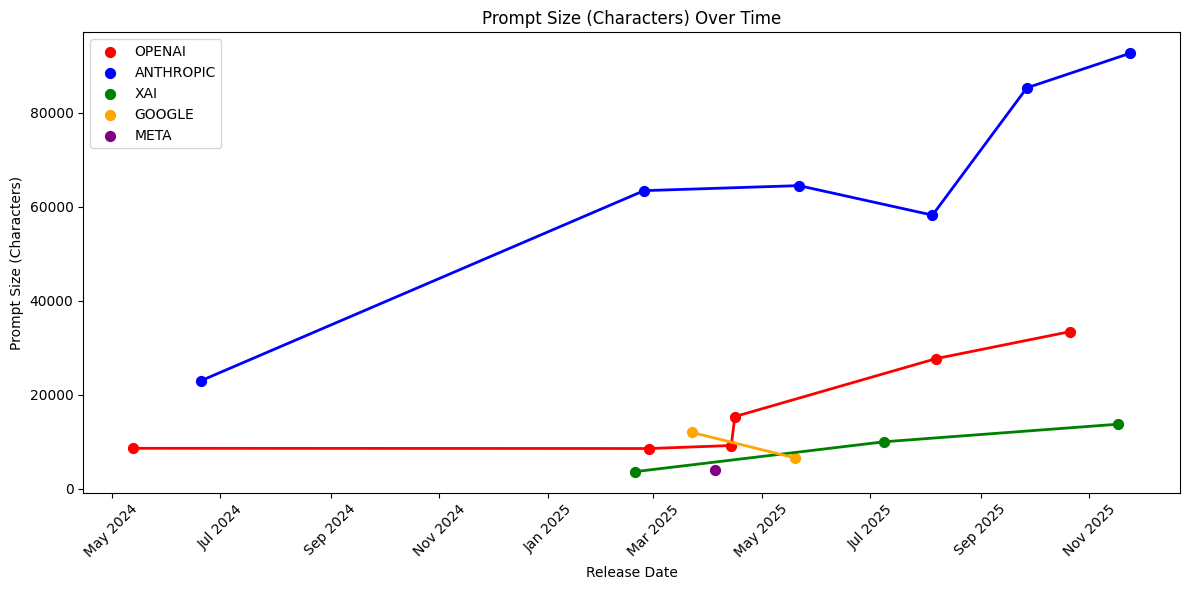

In [65]:
plot_prompt_evolution()

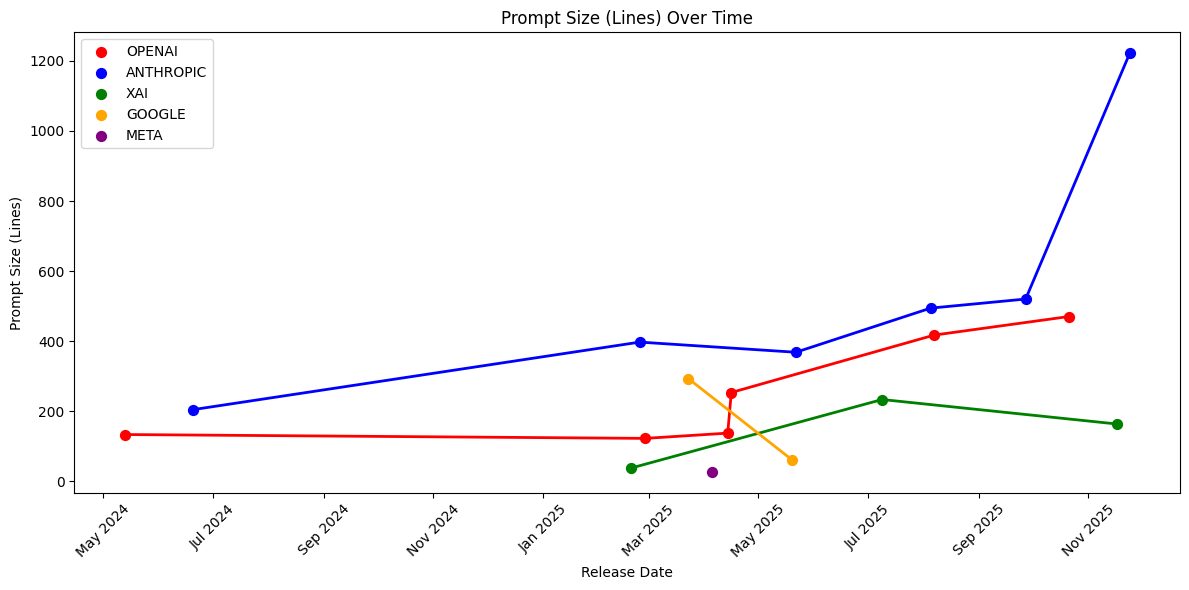

In [66]:
plot_prompt_evolution(metric='Size (Lines)')

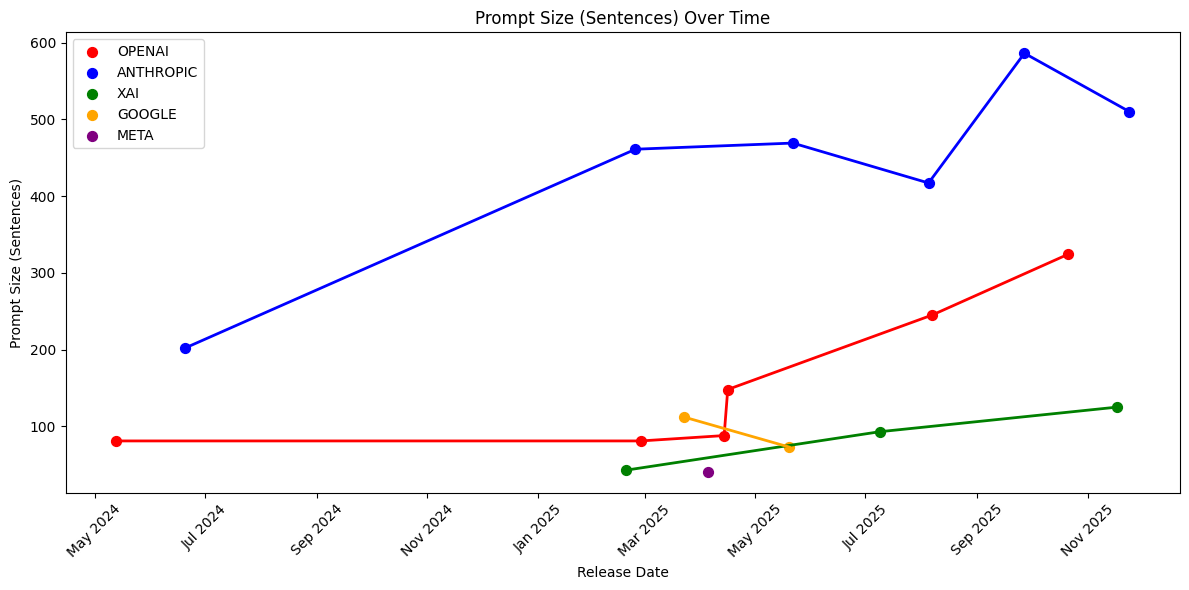

In [67]:
plot_prompt_evolution(metric='Size (Sentences)')

## NCtW Over Time

NCtW - the proportion of not-code related part of the prompt to the whole prompt


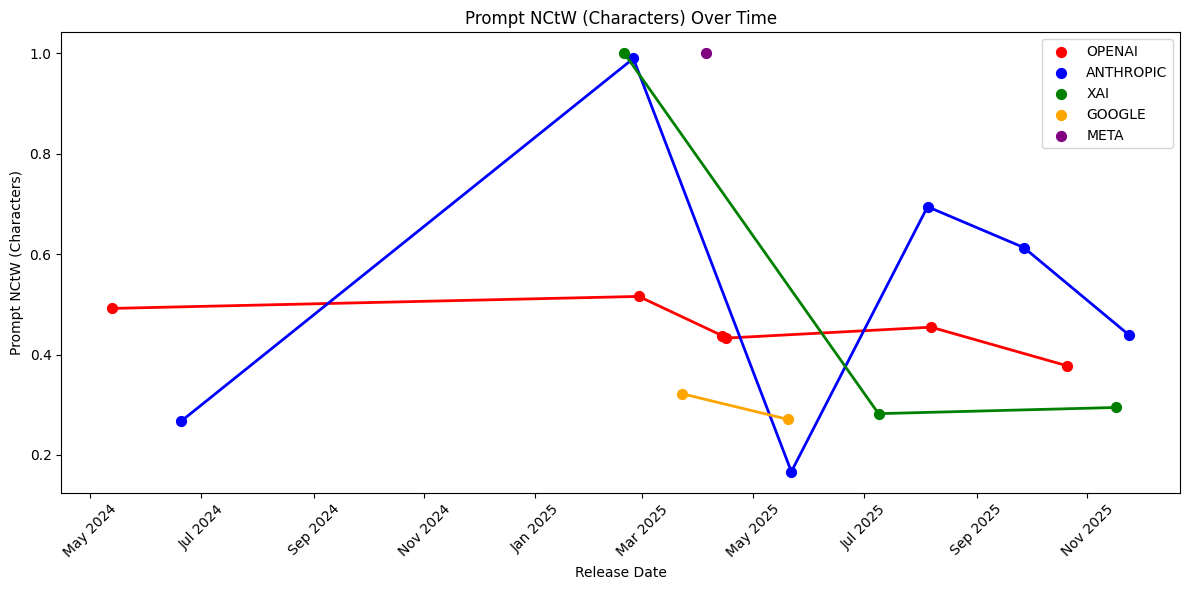

In [68]:
plot_prompt_evolution(metric='NCtW (Characters)')

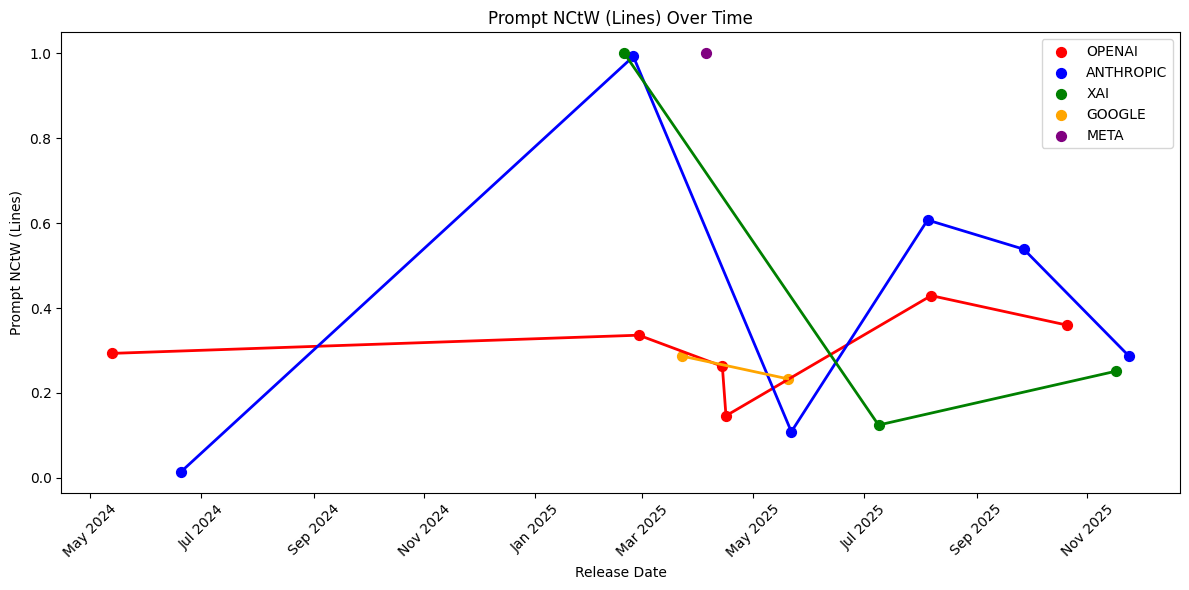

In [69]:
plot_prompt_evolution(metric='NCtW (Lines)')

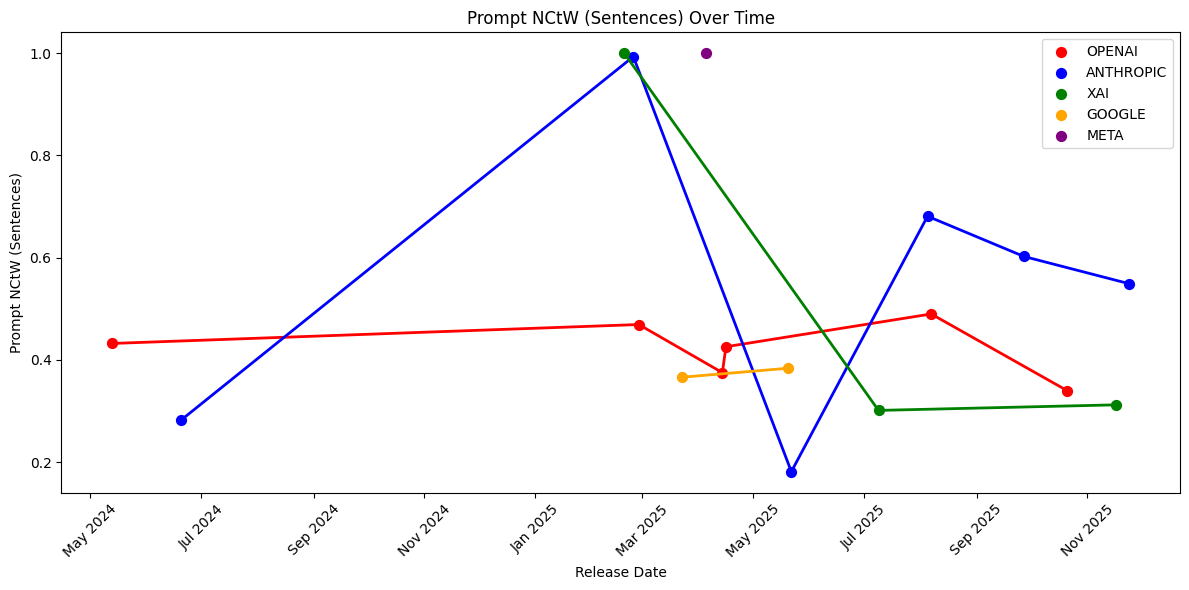

In [70]:
plot_prompt_evolution(metric='NCtW (Sentences)')

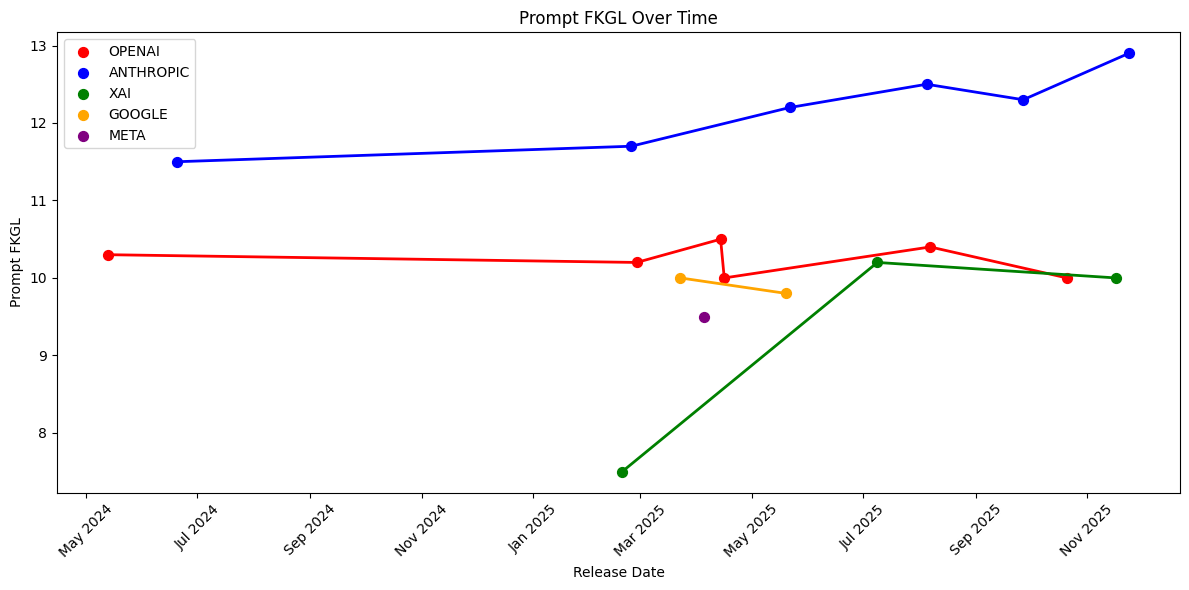

In [71]:
plot_prompt_evolution(metric='FKGL')

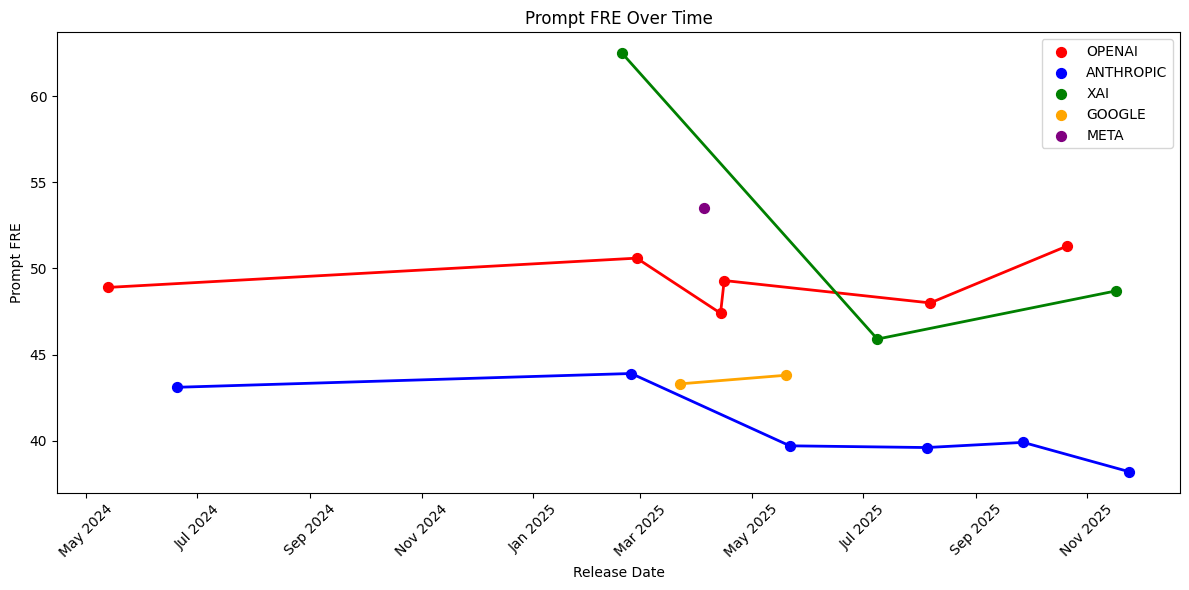

In [72]:
plot_prompt_evolution(metric='FRE')

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import zscore

In [74]:
df = collect_prompt_data()

In [75]:
def plot_correlation_matrix(df):
    numeric_cols = df.select_dtypes(include='number').columns
    non_zero_cols = numeric_cols[(df[numeric_cols] != 0).all()]
    non_zero_df = subset = df.loc[:, non_zero_cols]
    corr_matrix = non_zero_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

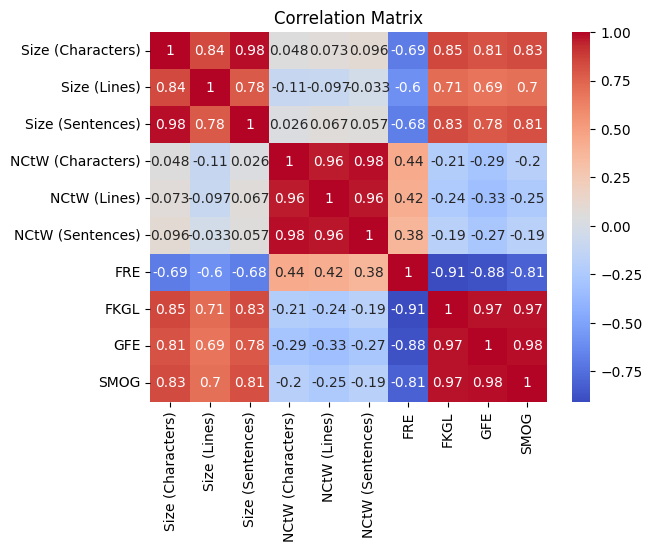

In [76]:
plot_correlation_matrix(df)

In [77]:

def plot_scatter_with_outliers(df, x_col='FRE', y_col='Size (Characters)', z_threshold = 2.0):
    # 1. Calculate Z-Scores
    df_copy = df.copy()
    df_copy['z_fre'] = zscore(df_copy[x_col])
    df_copy['z_size'] = zscore(df_copy[y_col])

    # 2. Setup the plot
    plt.figure(figsize=(10, 6))

    sns.scatterplot(
        data=df_copy,
        x=x_col, 
        y=y_col, 
        hue='provider',    
        style='provider',  
        s=100              
    )

    # 3. Calculate the actual values for Mean and 2.0 Std Dev
    mean_fre = df_copy[x_col].mean()
    std_fre = df_copy[x_col].std()
    mean_size = df_copy[y_col].mean()
    std_size = df_copy[y_col].std()

    # 4. Draw the 2.0 Std Dev Lines (The "Outlier Boundaries")
    plt.axvline(x=mean_fre + 2 * std_fre, color='green', linestyle='--', alpha=0.7, label=f'{x_col} (+{z_threshold} SD)')
    plt.axvline(x=mean_fre - 2 * std_fre, color='green', linestyle='--', alpha=0.7, label=f'{x_col} (-{z_threshold} SD)')
    plt.axhline(y=mean_size + 2 * std_size, color='orange', linestyle='--', alpha=0.7, label=f'{y_col} (+{z_threshold} SD)')

    # 5. Label the Outliers with Z-Score Threshold
    for i, row in df_copy.iterrows():
        if abs(row['z_fre']) > z_threshold or abs(row['z_size']) > z_threshold:
            plt.text(
                x=row[x_col] + 1, 
                y=row[y_col], 
                s=row['model'], 
                fontsize=9,
                color='red',
                weight='bold'
            )

    plt.title(f'Prompt Complexity with Outlier Boundaries ({z_threshold} SD)', fontsize=14)
    plt.xlabel(f'{x_col} (0-100)', fontsize=12)
    plt.ylabel(f'{y_col} (Number of Characters)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim(0, 100)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 

    plt.show()

In [78]:
def plot_scatter_grouped_by_provider(
    df,
    x_col='FRE',
    y_col='Size (Characters)'
):
    # 1. Group by provider
    grouped = (
        df
        .groupby('provider', as_index=False)
        .agg({
            x_col: 'mean',
            y_col: 'mean'
        })
    )

    # 2. Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.scatterplot(
        data=grouped,
        x=x_col,
        y=y_col,
        hue='provider',
        style='provider',
        s=300,  # increase point size
        ax=ax
    )

    # 3. Formatting with bold and bigger fonts
    ax.set_title('Prompt Complexity by Provider (Averaged)', fontsize=18, fontweight='bold')
    ax.set_xlabel(f'{x_col} (0–100)', fontsize=14, fontweight='bold')
    ax.set_ylabel(f'{y_col} (Number of Characters)', fontsize=14, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.6)

    # 4. Legend formatting
    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        title='Provider',
        title_fontsize=12,
        fontsize=12
    )

    plt.tight_layout()
    plt.show()


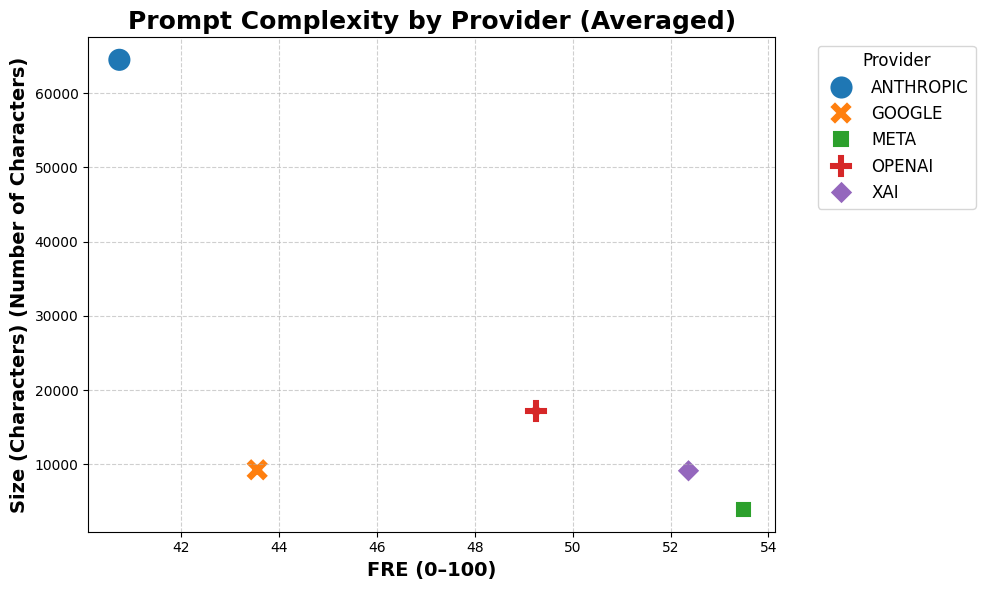

In [79]:
plot_scatter_grouped_by_provider(df, x_col='FRE', y_col='Size (Characters)')

# Deontic analysis

In [80]:
from analysis import analyze_all_prompts
from collections import Counter
import ternary

In [81]:
def count_deontic_values(regulative_components):
    """Extract and count deontic values from regulative components."""
    if not regulative_components:
        return {}
    deontic_values = [component['D'] for component in regulative_components]
    deontic_values = [deontic.lower() for deontic in deontic_values if deontic != "" and deontic is not None]
    return Counter(deontic_values)

In [82]:
df = analyze_all_prompts()

In [83]:
df['deontic_counts'] = df['regulative_components'].apply(count_deontic_values)
df[['deontic_counts']].head()

,deontic_counts
0,"{'can': 8, 'should': 17, 'must': 1}"
1,"{'can': 1, 'cannot': 3}"
2,"{'can': 50, 'should': 88, 'must': 92, 'may': 7..."
3,"{'can': 18, 'should': 51, 'must': 40, 'cannot'..."
4,"{'can': 27, 'should': 87, 'must': 91, 'may': 2..."


In [84]:
# Expand deontic counts into separate columns
deontic_df = pd.DataFrame(df['deontic_counts'].tolist(), index=df.index).fillna(0)

# Combine with provider and model information
analysis_df = pd.concat([df[['provider', 'model', 'version', 'release_date', 'S']], deontic_df], axis=1)

# Create a model label with version for better identification
analysis_df['model_label'] = analysis_df['model'] + ' ' + analysis_df['version']

# Sort by provider and model for better visualization
analysis_df_sorted = analysis_df.sort_values(['provider', 'release_date', 'model'])

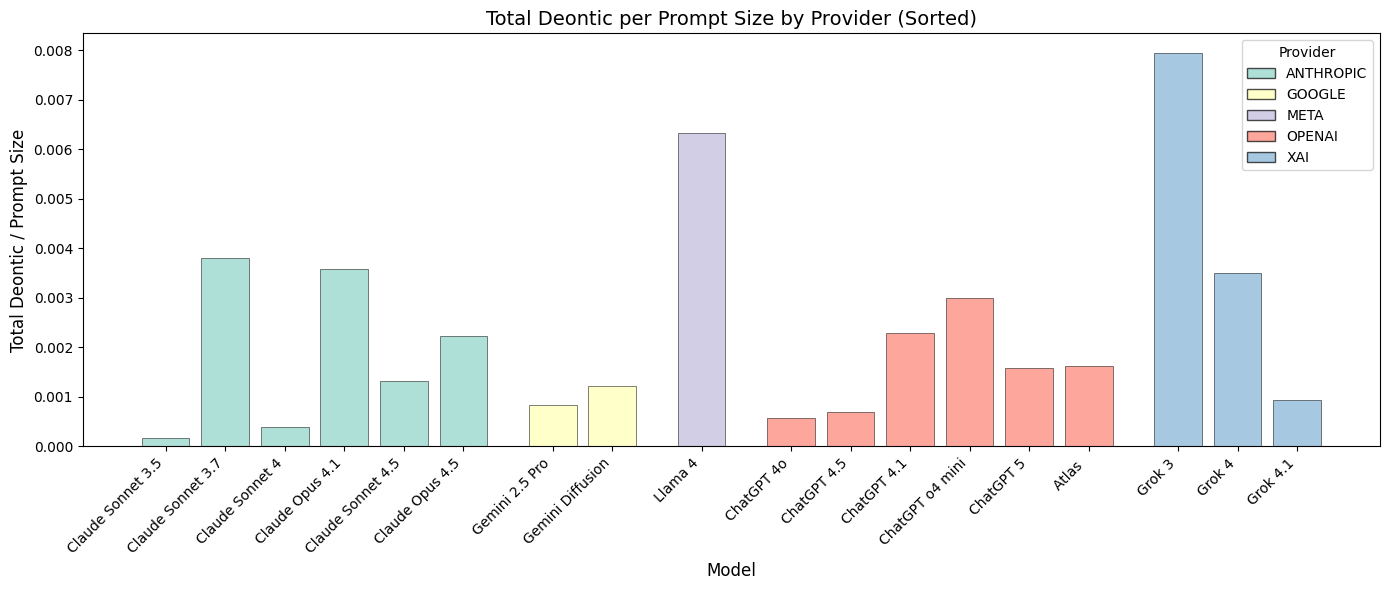


Mean Deontic Values per Prompt Size by Provider:


,can,should,must,cannot,may,has to,will
provider,,,,,,,
ANTHROPIC,0.000338,0.000797,0.000715,0.000048,0.000024,0.000000,0.000000
GOOGLE,0.000229,0.000000,0.000417,0.000306,0.000000,0.000076,0.000000
META,0.000506,0.003292,0.001266,0.000000,0.000000,0.000000,0.001266
OPENAI,0.000131,0.000523,0.000813,0.000000,0.000160,0.000000,0.000000
XAI,0.001652,0.000397,0.001800,0.000049,0.000230,0.000000,0.000000


In [85]:
# Add total deontic count column for sorting
analysis_df_sorted['total_deontic'] = analysis_df_sorted[deontic_df.columns].sum(axis=1)
size_safe = analysis_df_sorted['S'].replace(0, pd.NA)
analysis_df_sorted['deontic_per_size'] = (analysis_df_sorted['total_deontic'] / size_safe).fillna(0)

# Sort by provider first, then by release date within each provider
analysis_df_sorted = analysis_df_sorted.sort_values(['provider', 'release_date'], ascending=[True, True])

# Create histogram grouped by provider
fig, ax = plt.subplots(figsize=(14, 6))

# Get unique providers and assign colors
providers = analysis_df_sorted['provider'].unique()
colors = plt.cm.Set3(range(len(providers)))
provider_colors = dict(zip(providers, colors))

# Plot bars for each model, grouped by provider
x_pos = 0
x_ticks = []
x_labels = []

for provider in providers:
    provider_data = analysis_df_sorted[analysis_df_sorted['provider'] == provider]
    
    for idx, row in provider_data.iterrows():
        # Use deontic count normalized by prompt size
        deontic_per_size = row['deontic_per_size']
        
        ax.bar(x_pos, deontic_per_size, color=provider_colors[provider], 
               edgecolor='black', linewidth=0.5, alpha=0.7)
        x_ticks.append(x_pos)
        x_labels.append(row['model_label'])
        x_pos += 1
    
    # Add some spacing between providers
    x_pos += 0.5

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_title('Total Deontic per Prompt Size by Provider (Sorted)', fontsize=14)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Total Deontic / Prompt Size', fontsize=12)

# Create legend
legend_elements = [plt.Rectangle((0,0),1,1, fc=provider_colors[p], alpha=0.7, edgecolor='black') 
                   for p in providers]
ax.legend(legend_elements, providers, title='Provider', loc='upper right')

plt.tight_layout()
plt.show()

# Display size-normalized summary statistics by provider
print("\nMean Deontic Values per Prompt Size by Provider:")
deontic_per_size_df = deontic_df.div(analysis_df['S'].replace(0, pd.NA), axis=0).fillna(0)
provider_means = deontic_per_size_df.join(analysis_df[['provider']]).groupby('provider').mean()
display(provider_means)

In [86]:
def classify_deontic(deontic):
    """Classify a deontic value into command, permission, or prohibition."""
    deontic = deontic.lower().strip()
    if deontic in ["must", "should", "has to", "will"]:
        return "command"
    if deontic in ["may", "can"]:
        return "permission"
    if deontic in ["must not", "may not", "cannot"]:
        return "prohibition"
    return "other"

def count_classified_deontics(deontic_counts):
    """Count deontics by their classification."""
    classified = {"command": 0, "permission": 0, "prohibition": 0, "other": 0}
    
    for deontic, count in deontic_counts.items():
        category = classify_deontic(deontic)
        classified[category] += count
    
    return classified

In [87]:
df['classified_deontics'] = df['deontic_counts'].apply(count_classified_deontics)
classified_df = pd.DataFrame(df['classified_deontics'].tolist(), index=df.index)
result_df = pd.concat([df[['provider', 'model', 'version']], classified_df], axis=1)
display(result_df)

,provider,model,version,command,permission,prohibition,other
0,ANTHROPIC,Claude,Sonnet 4,18,8,0,0
1,ANTHROPIC,Claude,Sonnet 3.5,0,1,3,0
2,ANTHROPIC,Claude,Sonnet 3.7,180,57,4,0
3,ANTHROPIC,Claude,Sonnet 4.5,91,18,4,0
4,ANTHROPIC,Claude,Opus 4.1,178,29,2,0
5,ANTHROPIC,Claude,Opus 4.5,169,37,1,0
6,GOOGLE,Gemini,Diffusion,1,3,4,0
7,GOOGLE,Gemini,2.5 Pro,10,0,0,0
8,XAI,Grok,4,15,20,0,0
9,XAI,Grok,4.1,6,5,2,0


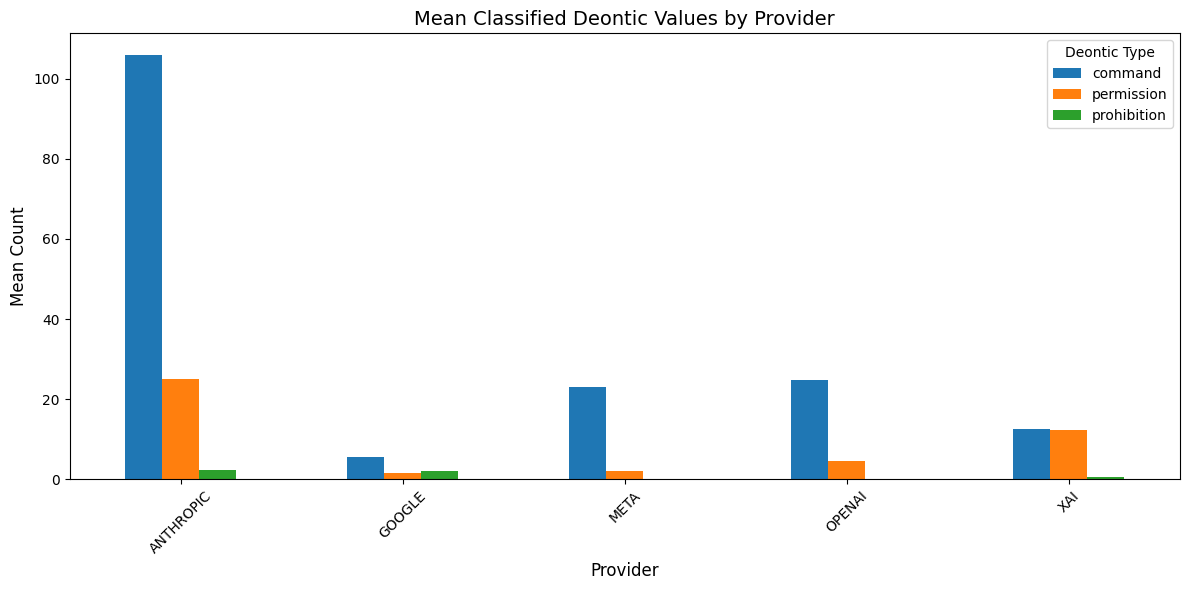


Classified Deontic Statistics by Provider:


,command,permission,prohibition
provider,,,
ANTHROPIC,106.000000,25.000000,2.333333
GOOGLE,5.500000,1.500000,2.000000
META,23.000000,2.000000,0.000000
OPENAI,24.666667,4.666667,0.000000
XAI,12.666667,12.333333,0.666667


In [88]:
fig, ax = plt.subplots(figsize=(12, 6))

provider_classified = result_df.groupby('provider')[['command', 'permission', 'prohibition']].mean()

provider_classified.plot(kind='bar', ax=ax, stacked=False)
ax.set_title('Mean Classified Deontic Values by Provider', fontsize=14)
ax.set_xlabel('Provider', fontsize=12)
ax.set_ylabel('Mean Count', fontsize=12)
ax.legend(title='Deontic Type', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nClassified Deontic Statistics by Provider:")
display(provider_classified)

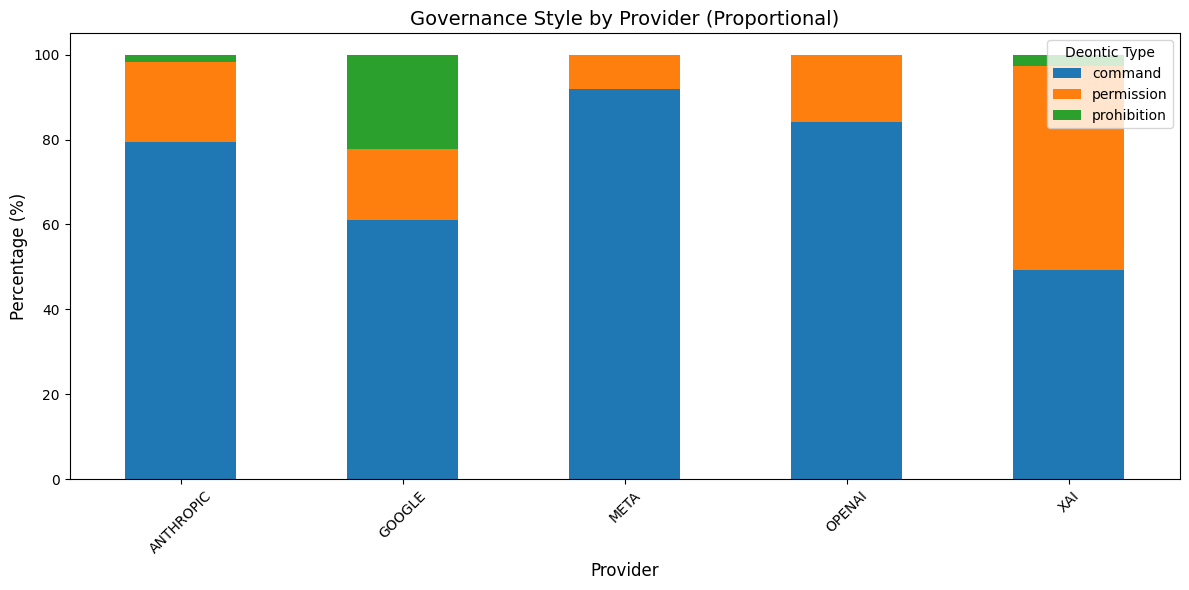


Proportional Distribution (%):


,command,permission,prohibition
provider,,,
ANTHROPIC,79.500000,18.750000,1.750000
GOOGLE,61.111111,16.666667,22.222222
META,92.000000,8.000000,0.000000
OPENAI,84.090909,15.909091,0.000000
XAI,49.350649,48.051948,2.597403


In [89]:
provider_classified_pct = result_df.groupby('provider')[['command', 'permission', 'prohibition']].mean()
provider_classified_pct = provider_classified_pct.div(provider_classified_pct.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(12, 6))
provider_classified_pct.plot(kind='bar', stacked=True, ax=ax, 
                             color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax.set_title('Governance Style by Provider (Proportional)', fontsize=14)
ax.set_xlabel('Provider', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.legend(title='Deontic Type', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nProportional Distribution (%):")
display(provider_classified_pct)

In [90]:
prompts_analysis = analyze_all_prompts()

In [91]:
df_grouped = (
    prompts_analysis
    .groupby("provider")[["StRS", "CtRS", "PRtRS", "PHtRS"]]
    .mean()
    .reset_index()
)

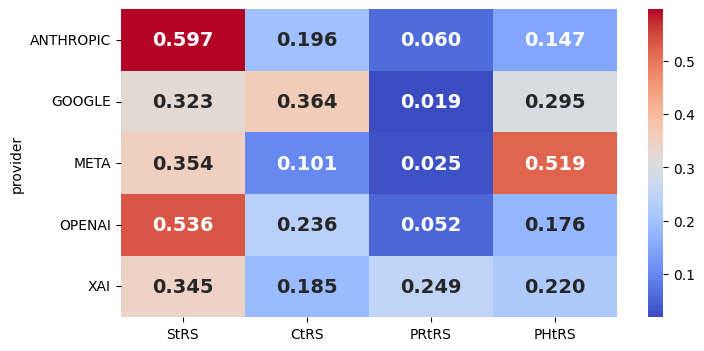

In [92]:
import seaborn as sns
df_indexed = df_grouped.set_index("provider")

# Plot heatmap with bigger, bold annotations
plt.figure(figsize=(8, 4))
sns.heatmap(
    df_indexed,
    annot=True,
    cmap='coolwarm',
    fmt=".3f",
    annot_kws={"size": 14, "weight": "bold"}  # bigger and bold text
)
# plt.title("Provider vs RS Metrics Heatmap", fontsize=16, weight='bold')
plt.show()

In [93]:
df_metrics = df_grouped.drop(columns=["StRS"])
df_metrics.set_index("provider", inplace=True)
df_normalized = df_metrics.div(df_metrics.sum(axis=1), axis=0) * 100
df_normalized

,CtRS,PRtRS,PHtRS
provider,,,
ANTHROPIC,48.569392,14.939283,36.491325
GOOGLE,53.731343,2.736318,43.532338
META,15.686275,3.921569,80.392157
OPENAI,50.761024,11.296370,37.942607
XAI,28.322873,38.111621,33.565506


c:\Users\wojom\anaconda3\envs\nlp\Lib\site-packages\ternary\plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


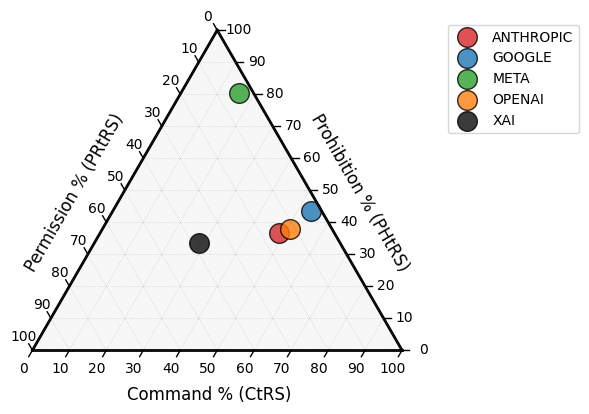


Ternary Plot Data (Command%, Prohibition%, Permission%):


,CtRS,PRtRS,PHtRS
provider,,,
ANTHROPIC,48.569392,14.939283,36.491325
GOOGLE,53.731343,2.736318,43.532338
META,15.686275,3.921569,80.392157
OPENAI,50.761024,11.296370,37.942607
XAI,28.322873,38.111621,33.565506


In [99]:

three_way = df_normalized[['CtRS', 'PRtRS', 'PHtRS']].copy()
three_way_pct = three_way.div(three_way.sum(axis=1), axis=0) * 100

# Convert DataFrame to list of tuples for ternary plotting
# Ternary expects (top, left, right) coordinates
# We'll use (command, prohibition, permission) mapping
points = []
labels = []
for provider, row in three_way_pct.iterrows():
    # Each point is (command%, prohibition%, permission%)
    point = (row['CtRS'], row['PHtRS'], row['PRtRS'])
    points.append(point)
    labels.append(provider)

### Scatter Plot
scale = 100  # Use 100 for percentage scale
figure, tax = ternary.figure(scale=scale)
# tax.set_title("Governance Philosophy Triangle", fontsize=14, fontweight='bold')
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=10, color="gray", alpha=0.4)

# Plot each provider with different colors
colors = ['#d62728', '#1f77b4', '#2ca02c', '#ff7f0e', "#0a0a0a"]
for i, (point, label) in enumerate(zip(points, labels)):
    tax.scatter([point], marker='o', s=200, color=colors[i % len(colors)], 
                label=label, alpha=0.8, edgecolors='black', linewidth=1)

# Add axis labels
tax.left_axis_label("Permission % (PRtRS)", fontsize=12, offset=0.14)
tax.right_axis_label("Prohibition % (PHtRS)", fontsize=12, offset=0.14)
tax.bottom_axis_label("Command % (CtRS)", fontsize=12, offset=0.08)
# Add legend and ticks
tax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
tax.ticks(axis='lbr', linewidth=1, multiple=10, offset=0.02)
tax.clear_matplotlib_ticks()

ax = tax.get_axes()
ax.set_aspect('equal')
ax.set_frame_on(False)
ax.patch.set_visible(False)
tax.show()

print("\nTernary Plot Data (Command%, Prohibition%, Permission%):")
display(three_way_pct)


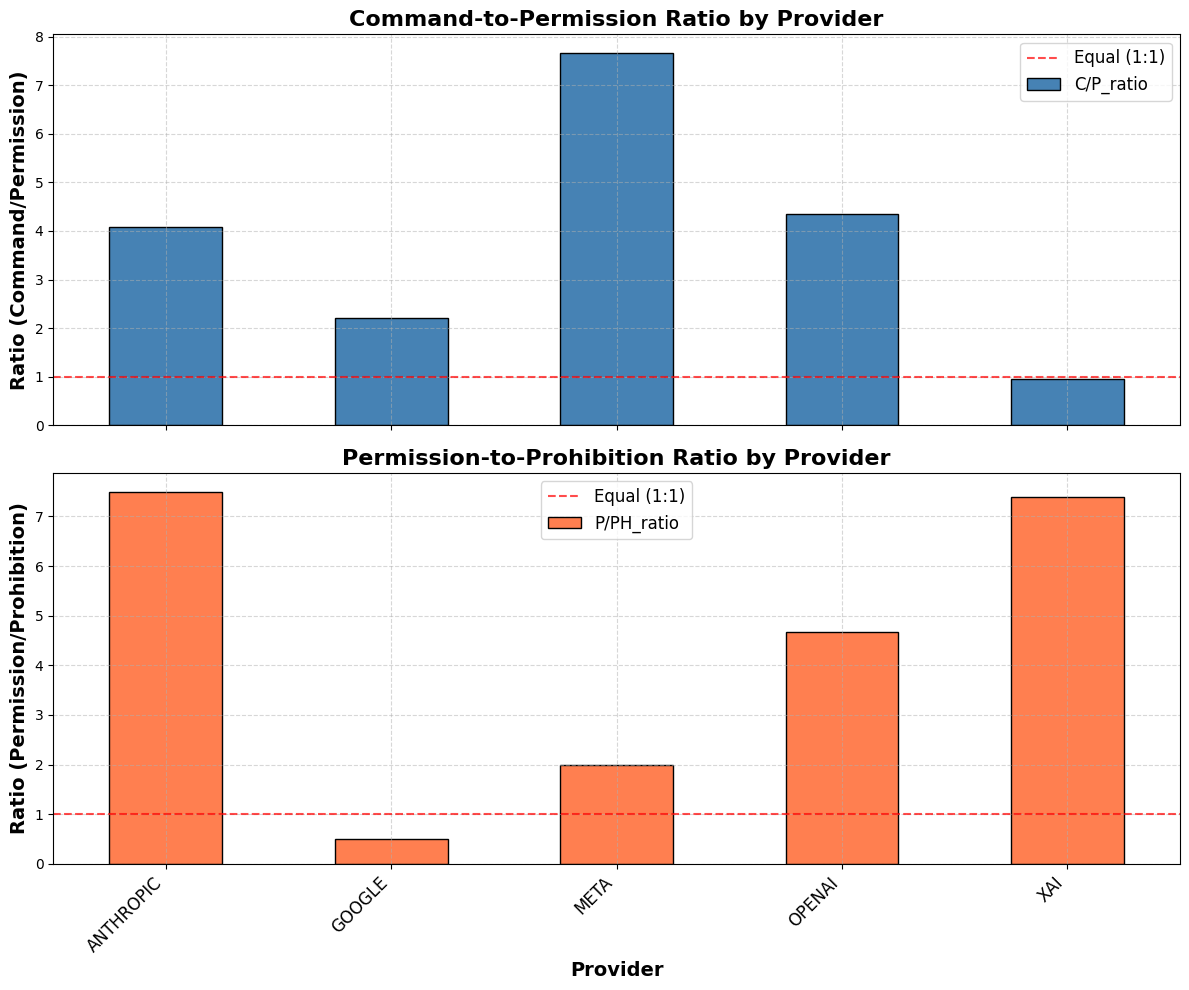


Ratios by Provider:


,C/P_ratio,P/PH_ratio
provider,,
ANTHROPIC,4.076923,7.500000
GOOGLE,2.200000,0.500000
META,7.666667,2.000000
OPENAI,4.352941,4.666667
XAI,0.950000,7.400000


In [95]:
# 3. Command-to-Permission and Permission-to-Prohibition Ratios - improved visibility
provider_ratios = provider_classified.copy()
provider_ratios['C/P_ratio'] = provider_classified['command'] / (provider_classified['permission'] + 1)  # +1 to avoid division by zero
provider_ratios['P/PH_ratio'] = provider_classified['permission'] / (provider_classified['prohibition'] + 1)

# Two rows stacked vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Command to Permission ratio
provider_ratios['C/P_ratio'].plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Command-to-Permission Ratio by Provider', fontsize=16, fontweight='bold')
ax1.set_ylabel('Ratio (Command/Permission)', fontsize=14, fontweight='bold')
ax1.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Equal (1:1)')
ax1.legend(fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)

# Permission to Prohibition ratio
provider_ratios['P/PH_ratio'].plot(kind='bar', ax=ax2, color='coral', edgecolor='black')
ax2.set_title('Permission-to-Prohibition Ratio by Provider', fontsize=16, fontweight='bold')
ax2.set_xlabel('Provider', fontsize=14, fontweight='bold')
ax2.set_ylabel('Ratio (Permission/Prohibition)', fontsize=14, fontweight='bold')
ax2.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Equal (1:1)')
ax2.legend(fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

print("\nRatios by Provider:")
display(provider_ratios[['C/P_ratio', 'P/PH_ratio']])


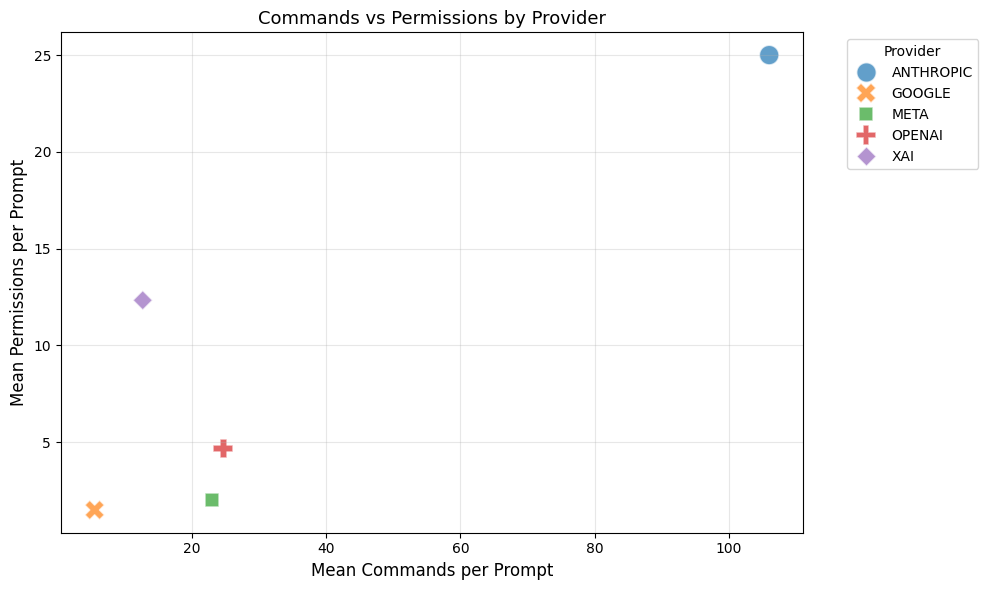

In [96]:
# Prepare data in long / tidy form
plot_df = provider_classified.reset_index()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    data=plot_df,
    x='command',
    y='permission',
    hue='provider',
    style='provider',   # <-- shapes per provider (same as before)
    s=200,
    alpha=0.7,
    ax=ax
)

# # Optional: label points (same as before)
# for _, row in plot_df.iterrows():
#     ax.text(
#         row['command'],
#         row['permission'],
#         row['provider'],
#         fontsize=10,
#         ha='center',
#         va='center'
#     )

# Formatting (kept consistent)
ax.set_xlabel('Mean Commands per Prompt', fontsize=12)
ax.set_ylabel('Mean Permissions per Prompt', fontsize=12)
ax.set_title(
    'Commands vs Permissions by Provider',
    fontsize=13
)
ax.grid(True, alpha=0.3)

# Legend layout — identical to previous plots
ax.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    title='Provider'
)

plt.tight_layout()
plt.show()


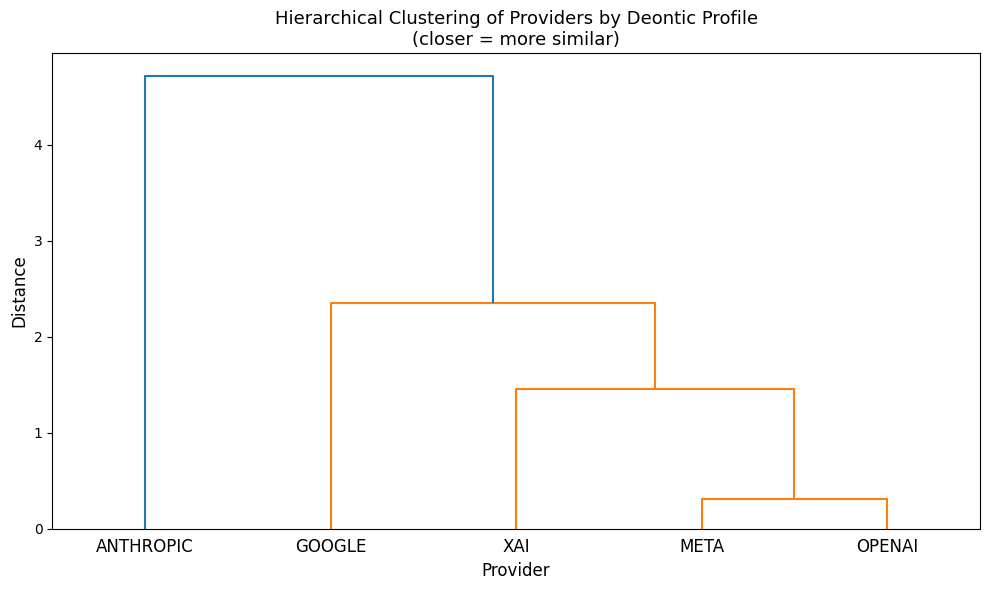


Clustering interpretation:
- Lower branching point = more similar providers
- Height shows dissimilarity between clusters


In [97]:
# 5. Hierarchical Clustering - quantifies provider similarities
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Use deontic profiles for clustering
clustering_data = provider_classified[['command', 'permission', 'prohibition']]

# Normalize the data for fair comparison
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clustering_data_normalized = scaler.fit_transform(clustering_data)

# Perform hierarchical clustering
linkage_matrix = linkage(clustering_data_normalized, method='ward')

# Plot dendrogram
fig, ax = plt.subplots(figsize=(10, 6))
dendrogram(linkage_matrix, labels=clustering_data.index, ax=ax, leaf_font_size=12)
ax.set_title('Hierarchical Clustering of Providers by Deontic Profile\n(closer = more similar)', fontsize=13)
ax.set_xlabel('Provider', fontsize=12)
ax.set_ylabel('Distance', fontsize=12)
plt.tight_layout()
plt.show()

print("\nClustering interpretation:")
print("- Lower branching point = more similar providers")
print("- Height shows dissimilarity between clusters")

In [98]:
"""Analyze prompts and compute various indicators."""

from datetime import datetime
import pandas as pd
from statements_type import get_deontic_and_aim_value, get_deontic_value
from metadata import METADATA
from config import DATASET_PATHS
from utils import read_prompt, read_statements_json, change_extension
from indicators import S, NCtW, NStNC, CStA, RtRS, NtRS, StRS, CtRS, PRtRS, PHtRS, get_regulative_components
import textstat

def analyze_prompt(path, data):
    """Analyze a single prompt and return its indicators along with metadata."""
    
    prompt, _ = read_prompt(f"{DATASET_PATHS['DATASET']}{path}")
    prompt_no_code, _ = read_prompt(f"{DATASET_PATHS['DATASET_CLEANED']}{path}")
    statements_json = read_statements_json(f"{DATASET_PATHS['STATEMENTS_JSON']}{change_extension(path)}")
    deontics = []
    aims = []
    for stmt in statements_json:
        result = get_deontic_and_aim_value(stmt)
        if result is not None:
            deontic, aim = result
            if deontic:
                deontics.append(deontic.lower())
                aims.append(aim.lower())
    return {
        "deontics": deontics,
        "aims": aims,
    }

def analyze_all_prompts():
    """Analyze all prompts in the dataset and return a DataFrame with their indicators."""
    prompts_analysis = []
    for path, data in METADATA.items():
        analysis = analyze_prompt(path, data)
        prompts_analysis.append(analysis)

    return pd.DataFrame(prompts_analysis)

ImportError: cannot import name 'get_deontic_and_aim_value' from 'statements_type' (d:\university\master_pw\nlp\SystemPromptDeconstruction\analysis\statements_type.py)

In [ ]:
prompts_analysis = analyze_all_prompts()

In [ ]:
unique_deontics = set()
unique_actions = set()
for deontic_list in prompts_analysis['deontics']:
    unique_deontics.update(deontic_list)
for action_list in prompts_analysis['aims']:
    unique_actions.update(action_list)

In [ ]:
unique_deontics

{'can', 'cannot', 'has to', 'may', 'must', 'should', 'will'}

In [ ]:
[action for action in unique_actions if "not" in action]

['note',
 'not speculate',
 'not thank',
 'not lecture',
 'not contain',
 'not consider',
 'not use',
 'not generate',
 'not output',
 'not reference',
 'not quote or reproduce',
 'not shy away from making',
 'not directly generate',
 'not trust',
 'not mention',
 'not include',
 'not quote',
 'not write',
 'not reproduce',
 'not produce',
 'not make up',
 'not reinforce',
 'not attempt',
 'not respond',
 'not provide',
 'not search',
 'not explain',
 'not remind',
 'not discuss',
 'not apologize',
 'not be done',
 'not be',
 'not directly interact',
 'not present',
 'not know',
 'not assume and inspect',
 'not look exactly like',
 'not claim',
 'not view',
 'not make use of',
 'not say',
 'not facilitate',
 'not place',
 'not add',
 'not reflexively treat',
 'not describe',
 'not appear',
 'not confirm',
 'not create',
 'not shy away from',
 'not make reference',
 'not list']

In [ ]:
prompts_analysis

,deontics,aims
0,"[can, can, can, should, should, should, should...","[tell, access, provide, encourage, tell, point..."
1,"[can, cannot, cannot, cannot]","[let, open, open, open]"
2,"[can, can, can, can, can, can, can, can, can, ...","[let, lead, drive, suggest, take, offer, illus..."
3,"[can, can, should, should, should, should, can...","[not view, not view, not apologize, not apolog..."
4,"[can, can, should, should, should, must, must,...","[create, reference, be used, be used, be used,..."
5,"[must, must, should, should, should, should, m...","[cite, attribute, be, see, not search, not sea..."
6,"[can, can, cannot, cannot, cannot, cannot, can...","[not generate, not generate, browse, access, a..."
7,"[must, must, must, must, must, must, must, mus...","[place, place, not place, be, be, use, place, ..."
8,"[can, can, can, can, can, can, can, can, must,...","[analyze, analyze, analyze, analyze, analyze, ..."
9,"[can, should, should, may, may, may, should, s...","[edit, use, use, include, include, include, be..."


In [ ]:
prompts_analysis["deontics_not"] = prompts_analysis.apply(
    lambda row: [
        d
        for d, a in zip(row["deontics"], row["aims"])
        if "not" in a
    ],
    axis=1
)

In [ ]:
prompts_analysis["deontics_not"]

0                                      [should, should]
1                                                    []
2     [should, should, should, should, must, must, s...
3     [can, can, should, should, should, should, sho...
4     [must, should, should, must, must, must, must,...
5     [should, should, must, must, must, must, must,...
6                                    [can, can, has to]
7                                          [must, must]
8                                [should, should, must]
9                                                    []
10     [must, must, must, must, must, must, must, must]
11                                        [should, can]
12                                               [must]
13                                                   []
14                                     [should, should]
15                                                   []
16                                             [should]
17    [should, should, will, will, will, will, w